In [1]:
import xarray as xr

ds = xr.open_dataset('data.nc').sel(expver=1)

ds

<xarray.Dataset> Size: 152MB
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float64 51MB ...
    skt        (time, latitude, longitude) float64 51MB ...
    tp         (time, latitude, longitude) float64 51MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

Change in temperature from 40 years to now

In [2]:
temp_change = (ds.skt.sel(time='2019-01-01') - ds.skt.sel(time='1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)> Size: 101kB
array([[ 1.25274587,  1.27784041,  1.27585926, ...,  0.03962296,
         0.10764237,  0.1901902 ],
       [ 1.18802837,  1.19793411,  1.16689612, ..., -0.0112265 ,
         0.01254727,  0.08056668],
       [ 1.00246085,  0.9965174 ,  0.94236603, ..., -0.04424564,
        -0.05217023, -0.00726421],
       ...,
       [-0.32953094, -0.31632328, -0.27075688, ...,  3.6136138 ,
         3.40031021,  3.53965094],
       [-0.39424844, -0.38236155, -0.36849351, ...,  3.45974464,
         3.42408398,  3.61427418],
       [-0.4563244 , -0.5250042 , -0.51707961, ...,  3.40295174,
         3.26229024,  3.32106429]])
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1

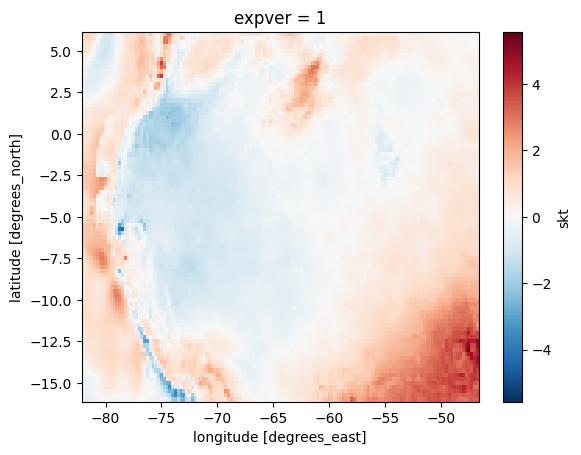

In [3]:
temp_change.plot()

On average, temperature has increased.

In [4]:
seasonal_change = (ds.lai_hv.sel(time='2019-07-01') - ds.lai_hv.sel(time='2019-01-01'))
seasonal_change

<xarray.DataArray 'lai_hv' (latitude: 89, longitude: 142)> Size: 101kB
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.54425896,
        -0.61248053, -0.51820286],
       [ 0.        ,  0.        ,  0.        , ..., -0.60069582,
        -0.61853506, -0.52425739],
       [ 0.        ,  0.        ,  0.        , ..., -0.59831726,
        -0.56728779, -0.53366353]])
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1

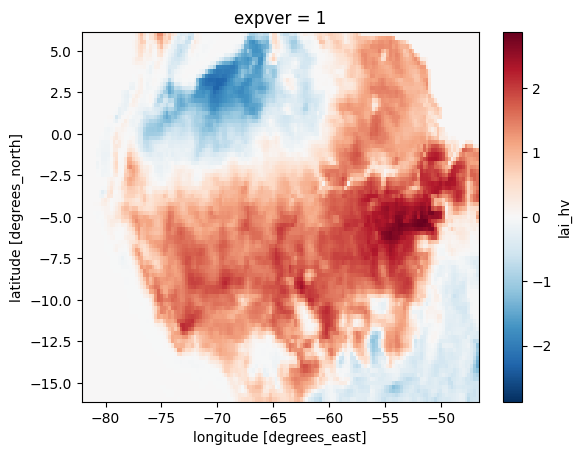

In [5]:
seasonal_change.plot()

#### Aggregations

In [7]:
ds.skt.mean()

<xarray.DataArray 'skt' ()> Size: 8B
array(297.26828526)
Coordinates:
    expver   int32 4B 1

In [11]:
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)> Size: 101kB
array([[300.88728805, 300.82707256, 300.7487045 , ..., 300.67129519,
        300.66464761, 300.68241296],
       [300.84077086, 300.78115608, 300.6775065 , ..., 300.68329347,
        300.68358653, 300.68769204],
       [300.74661197, 300.67358266, 300.5708136 , ..., 300.6844087 ,
        300.69275896, 300.69891059],
       ...,
       [293.93404366, 293.92296303, 293.8929859 , ..., 296.6980805 ,
        296.79721746, 296.82280663],
       [293.86407493, 293.85209654, 293.81709361, ..., 296.3055122 ,
        296.46129885, 296.48823663],
       [293.79879916, 293.77893331, 293.74452976, ..., 296.21547871,
        296.35273619, 296.19111085]])
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1

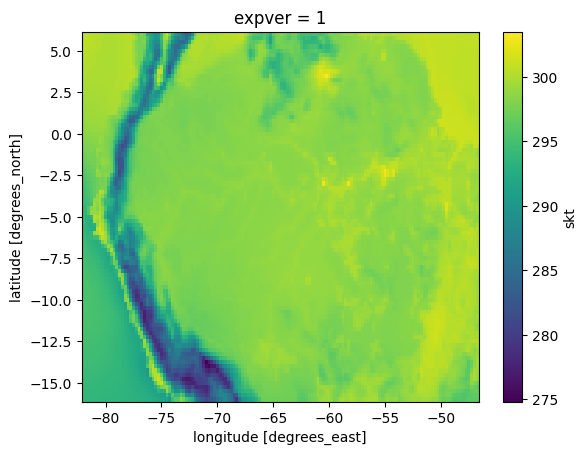

In [12]:
mean_temp.plot()

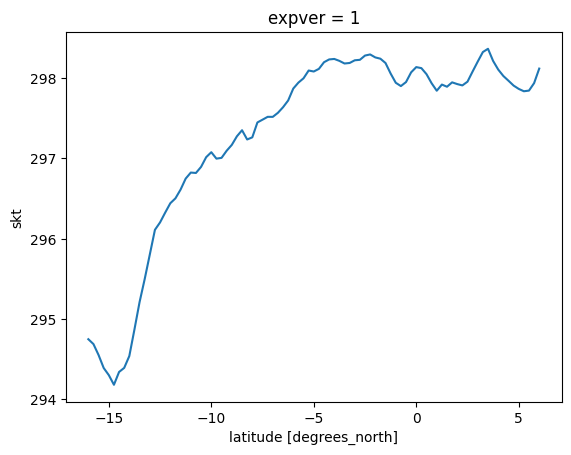

In [14]:
ds.skt.mean(dim=['time', 'longitude']).plot()

Mean skin temperature over time & longitude is increaing


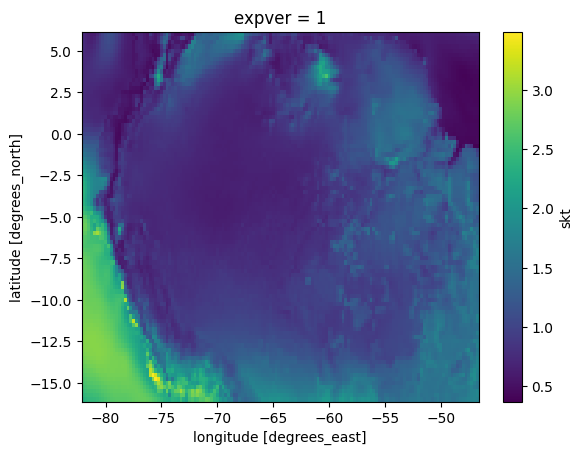

In [15]:
ds.skt.std(dim='time').plot()

Temperature variations over lat & long

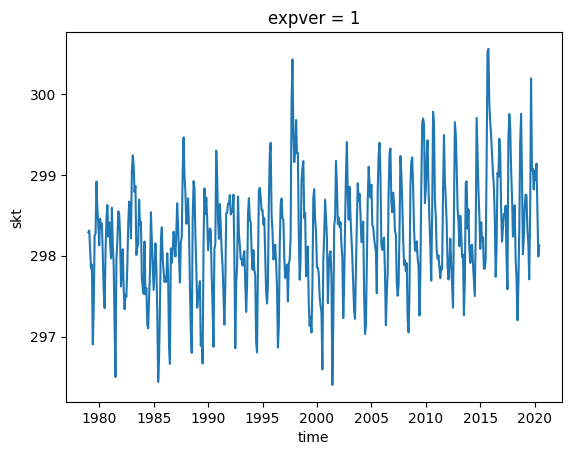

In [17]:
ds.skt.median(dim=['latitude', 'longitude']).plot()